<a href="https://colab.research.google.com/github/ShionFujimori/covid19-analysis/blob/master/covid19_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Configuration
1. Set up the kaggle API

In [0]:
# setup the kaggle API
from google.colab import drive
drive.mount('/content/drive')

!mkdir -p ~/.kaggle
!cp 'drive/My Drive/Colab Notebooks/kaggle/kaggle.json' ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!pip install --upgrade --force-reinstall --no-deps kaggle

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
     |████████████████████████████████| 61kB 1.9MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.6-cp36-none-any.whl size=72859 sha256=64be6c39e23da34b9e24c66e19e163ce10176799ef2f5a162025b2883c7fcb3e
  Stored in directory: /root/.cache/pip/wheels/57/4e/e8/bb28d035162fb8f17f8ca5d42c3230e284c6aa565b42b72674
Successfully built kaggle
  Found existing installation: kaggle 1.5.6
    Uninstalling kaggle-1.5.6:
      Successfully uninstalled kaggle-1.5.6


# Novel Corona Virus 2019 Dataset by SRK
1. covid_19_data.csv

## Download the dataset

In [0]:
# load datasets (kaggle: Novel-Corona-Virus-2019-dataset managed by SRK)
import zipfile

!kaggle datasets download -d sudalairajkumar/novel-corona-virus-2019-dataset -f covid_19_data.csv

with zipfile.ZipFile('./covid_19_data.csv.zip', 'r') as zip_ref:
  zip_ref.extractall('./covid_19_data')

  0% 0.00/261k [00:00<?, ?B/s]
100% 261k/261k [00:00<00:00, 70.0MB/s]


## Overall Data Info
1. Read the csv file and observe the overall data
2. Observe the daily transition of COVID-19 cases

In [0]:
# obtain data using Pandas
import pandas as pd

data = pd.read_csv("./covid_19_data/covid_19_data.csv", index_col="SNo", parse_dates=["ObservationDate"])
print(f"Data shape: {data.shape}\n")

data

Data shape: (22512, 7)



,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
SNo,,,,,,,
1,2020-01-22,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
2,2020-01-22,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
3,2020-01-22,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
4,2020-01-22,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
5,2020-01-22,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...
22508,2020-05-07,Wyoming,US,2020-05-08 02:32:32,635.0,7.0,0.0
22509,2020-05-07,Xinjiang,Mainland China,2020-05-08 02:32:32,76.0,3.0,73.0
22510,2020-05-07,Yukon,Canada,2020-05-08 02:32:32,11.0,0.0,0.0


In [0]:
# summary function (not very useful here)
data.describe()

,Confirmed,Deaths,Recovered
count,22512.000000,22512.000000,22512.000000
mean,4403.535270,283.500355,1229.010661
std,19830.661023,1890.383160,8448.721463
min,0.000000,0.000000,0.000000
25%,13.000000,0.000000,0.000000
50%,141.000000,2.000000,4.000000
75%,990.000000,15.000000,120.000000
max,327469.000000,30615.000000,195036.000000


In [0]:
# obtain ObservationDate vs (Confirmed/Deaths/Recovered) data
confirmed_vs_date = data.groupby("ObservationDate").Confirmed.sum()
deaths_vs_date = data.groupby("ObservationDate").Deaths.sum()
recovered_vs_date = data.groupby("ObservationDate").Recovered.sum()

daily_data = pd.concat([confirmed_vs_date, deaths_vs_date, recovered_vs_date], axis=1).astype("int32")
daily_data

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,555,17,28
2020-01-23,653,18,30
2020-01-24,941,26,36
2020-01-25,1438,42,39
2020-01-26,2118,56,52
...,...,...,...
2020-05-03,3506729,247470,1125236
2020-05-04,3583055,251537,1162724
2020-05-05,3662691,257239,1198832


## Visualize the data
1. Cumulative Confirmed Cases vs Observation Date
2. Cumulative Deaths vs Observation Date
3. Cumulative Recovered Cases vs Observation Date

In [0]:
# visualize the data
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


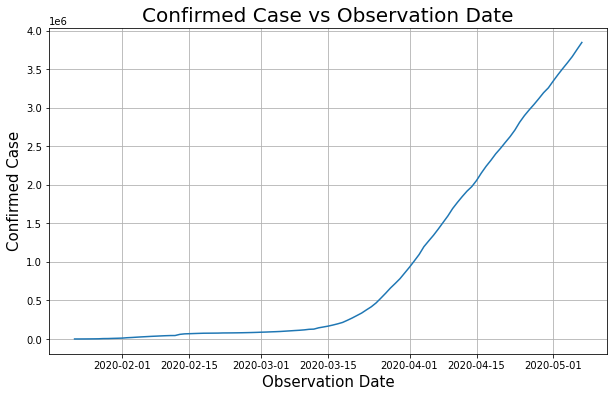

In [0]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=daily_data.index, y=daily_data.Confirmed)
plt.grid()
plt.title("Confirmed Case vs Observation Date", fontsize=20)
plt.ylabel("Confirmed Case", fontsize=15)
plt.xlabel("Observation Date", fontsize=15)
plt.show()

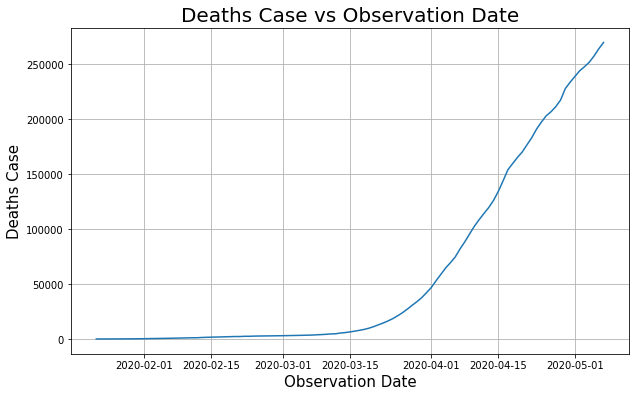

In [0]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=daily_data.index, y=daily_data.Deaths)
plt.grid()
plt.title("Deaths Case vs Observation Date", fontsize=20)
plt.ylabel("Deaths Case", fontsize=15)
plt.xlabel("Observation Date", fontsize=15)
plt.show()

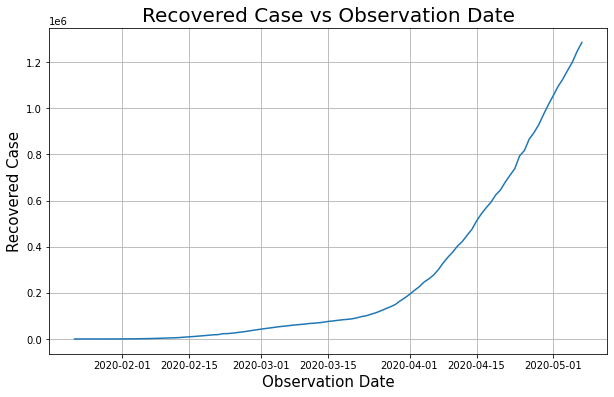

In [0]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=daily_data.index, y=daily_data.Recovered)
plt.grid()
plt.title("Recovered Case vs Observation Date", fontsize=20)
plt.ylabel("Recovered Case", fontsize=15)
plt.xlabel("Observation Date", fontsize=15)
plt.show()

## Daily transition of COVID-19 cases
1. Group the data by observed date and country
2. China -- daily transition
3. USA -- daily transition
4. Japan -- daily transition

In [0]:
# Group the data by ObservationDate and Country/Region

daily_country_data = data.groupby(["ObservationDate", "Country/Region"]) \
                    [["Confirmed", "Deaths", "Recovered"]].sum().reset_index()

daily_country_data

,ObservationDate,Country/Region,Confirmed,Deaths,Recovered
0,2020-01-22,Hong Kong,0.0,0.0,0.0
1,2020-01-22,Japan,2.0,0.0,0.0
2,2020-01-22,Macau,1.0,0.0,0.0
3,2020-01-22,Mainland China,547.0,17.0,28.0
4,2020-01-22,South Korea,1.0,0.0,0.0
...,...,...,...,...,...
12421,2020-05-07,West Bank and Gaza,375.0,2.0,176.0
12422,2020-05-07,Western Sahara,6.0,0.0,5.0
12423,2020-05-07,Yemen,25.0,5.0,1.0
12424,2020-05-07,Zambia,153.0,4.0,103.0


In [0]:
# Example 1: China -- daily transition
daily_country_data.query('`Country/Region` == "Mainland China"').set_index("ObservationDate")

,Country/Region,Confirmed,Deaths,Recovered
ObservationDate,,,,
2020-01-22,Mainland China,547.0,17.0,28.0
2020-01-23,Mainland China,639.0,18.0,30.0
2020-01-24,Mainland China,916.0,26.0,36.0
2020-01-25,Mainland China,1399.0,42.0,39.0
2020-01-26,Mainland China,2062.0,56.0,49.0
...,...,...,...,...
2020-05-03,Mainland China,82880.0,4633.0,77766.0
2020-05-04,Mainland China,82881.0,4633.0,77853.0
2020-05-05,Mainland China,82883.0,4633.0,77911.0


In [0]:
# Example 2: US -- daily transition
daily_country_data.query('`Country/Region` == "US"').set_index("ObservationDate")

,Country/Region,Confirmed,Deaths,Recovered
ObservationDate,,,,
2020-01-22,US,1.0,0.0,0.0
2020-01-23,US,1.0,0.0,0.0
2020-01-24,US,2.0,0.0,0.0
2020-01-25,US,2.0,0.0,0.0
2020-01-26,US,5.0,0.0,0.0
...,...,...,...,...
2020-05-03,US,1158040.0,67682.0,180152.0
2020-05-04,US,1180375.0,68922.0,187180.0
2020-05-05,US,1204351.0,71064.0,189791.0


In [0]:
# Example 3: Japan -- daily transition
daily_country_data.query('`Country/Region` == "Japan"').set_index("ObservationDate")

,Country/Region,Confirmed,Deaths,Recovered
ObservationDate,,,,
2020-01-22,Japan,2.0,0.0,0.0
2020-01-23,Japan,1.0,0.0,0.0
2020-01-24,Japan,2.0,0.0,0.0
2020-01-25,Japan,2.0,0.0,0.0
2020-01-26,Japan,4.0,0.0,1.0
...,...,...,...,...
2020-05-03,Japan,14877.0,487.0,3981.0
2020-05-04,Japan,15078.0,536.0,4156.0
2020-05-05,Japan,15253.0,556.0,4496.0


## Choropleth Graph
1. The Spread of COVID-19 Cases Across World
2. The Spread of COVID-19 Deaths Across World
3. The COVID-19 Recovery Rate Across World

In [0]:
# plotly: interactive graphing library for Python
import plotly.offline as py
import plotly.express as px

# numpy lirary
import numpy as np

# obtain a copy of daily_country_data
choropleth_data = daily_country_data.copy()

# fix ObservationDate datatype from Timesatmp to String
choropleth_data.ObservationDate = choropleth_data.ObservationDate.astype(str)

# take logarithms (Confirmed, Deaths, Recovered)
choropleth_data["Confirmed (logarithmic scale)"] = np.log1p(choropleth_data.Confirmed)
choropleth_data["Deaths (logarithmic scale)"] = np.log1p(choropleth_data.Deaths)
choropleth_data["Recovered (logarithmic scale)"] = np.log1p(choropleth_data.Recovered)

# calculate the recovery rate
choropleth_data["RecoveryRate"] = (choropleth_data.Recovered / (choropleth_data.Confirmed+1e-6)).round(3)

In [0]:
# Plotting a Running Map for observing the spread of COVID-19 Confirmed Cases

fig = px.choropleth(choropleth_data, 
                    locations="Country/Region", 
                    locationmode='country names', 
                    color="Confirmed (logarithmic scale)", 
                    hover_name="Country/Region",
                    projection="mercator",
                    animation_frame="ObservationDate",
                    width=1000, 
                    height=800,
                    color_continuous_scale=px.colors.sequential.Oranges,
                    title='The Spread of COVID-19 Cases Across World')

py.offline.iplot(fig)

In [0]:
# Plotting a Running Map for observing the spread of COVID-19 deaths

fig = px.choropleth(choropleth_data, 
                    locations="Country/Region", 
                    locationmode='country names', 
                    color="Deaths (logarithmic scale)",
                    hover_name="Country/Region",
                    projection="mercator",
                    animation_frame="ObservationDate",
                    width=1000, 
                    height=800,
                    color_continuous_scale=px.colors.sequential.Oranges,
                    title='The Spread of COVID-19 Deaths Across World')

py.offline.iplot(fig)

In [0]:
# Plotting a Running Map for observing the COVID-19 recovery rate

fig = px.choropleth(choropleth_data, 
                    locations="Country/Region", 
                    locationmode='country names', 
                    color="RecoveryRate",
                    hover_name="Country/Region",
                    projection="mercator",
                    animation_frame="ObservationDate",
                    width=1000, 
                    height=800,
                    color_continuous_scale=px.colors.sequential.Oranges,
                    title='The COVID-19 Recovery Rate Across World')

py.offline.iplot(fig)

## Country-wise reported cases

In [0]:
newest_date = pd.to_datetime("2020-05-07")

countrywise_data = daily_country_data.query("ObservationDate == @newest_date")
countrywise_data = countrywise_data.groupby("Country/Region")[["Confirmed", "Deaths", "Recovered"]].sum()
countrywise_data = countrywise_data.sort_values("Confirmed", ascending=False).astype("int32")

# Add "Active" cases column
countrywise_data["Active"] = \
  (countrywise_data.Confirmed - countrywise_data.Deaths - countrywise_data.Recovered).astype("int32")

# Add "MortalityRate(%)" column
countrywise_data["MortalityRate(%)"] = \
  (100 * countrywise_data.Deaths / countrywise_data.Confirmed).round(1)

# Color the background in a gradient
countrywise_data.style \
  .background_gradient(cmap='Blues',subset=["Confirmed"]) \
  .background_gradient(cmap='Reds',subset=["Deaths"]) \
  .background_gradient(cmap='Greens',subset=["Recovered"]) \
  .background_gradient(cmap='Oranges',subset=["Active"]) \
  .background_gradient(cmap='Purples',subset=["MortalityRate(%)"])

,Confirmed,Deaths,Recovered,Active,MortalityRate(%)
Country/Region,,,,,
US,1257023,75662,195036,986325,6.000000
Spain,221447,26070,128511,66866,11.800000
Italy,215858,29958,96276,89624,13.900000
UK,207977,30689,970,176318,14.800000
Russia,177160,1625,23803,151732,0.900000
France,174918,25990,55191,93737,14.900000
Germany,169430,7392,141700,20338,4.400000
Brazil,135773,9190,55350,71233,6.800000
Turkey,133721,3641,82984,47096,2.700000


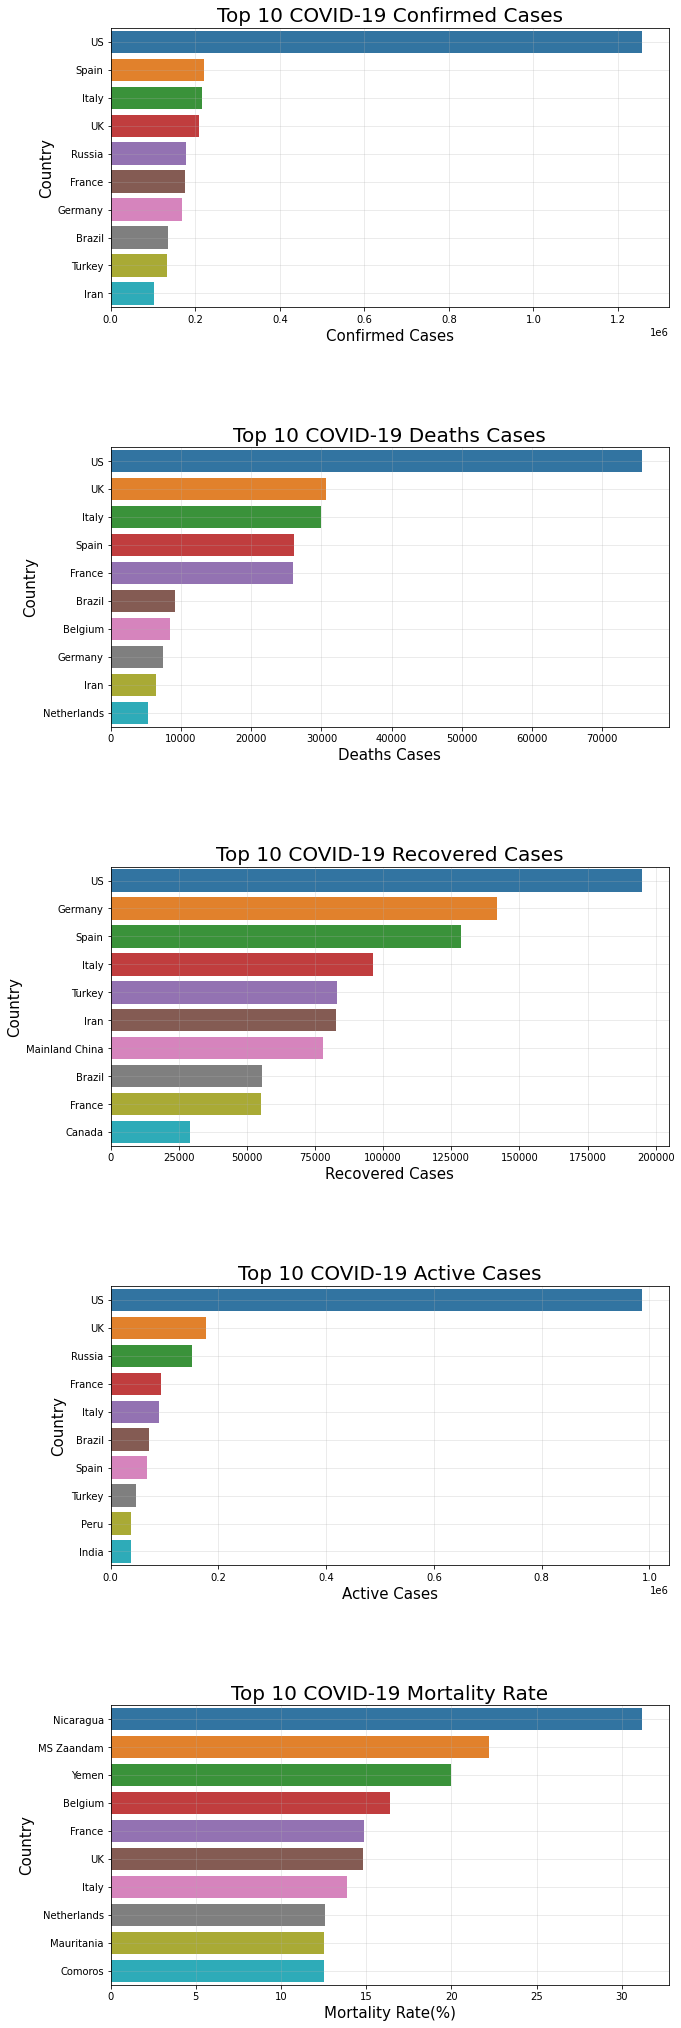

In [0]:
# === Top 10 bar plots ===
fig = plt.figure(figsize=(10, 36))

# Confirmed cases
sns.barplot(x=countrywise_data["Confirmed"][:10], 
            y=countrywise_data.index[:10],
            ax=fig.add_subplot(5, 1, 1))
plt.grid(alpha=0.3)
plt.title("Top 10 COVID-19 Confirmed Cases", fontsize=20)
plt.ylabel("Country", fontsize=15)
plt.xlabel("Confirmed Cases", fontsize=15)

# Deaths cases
temp = countrywise_data.sort_values("Deaths", ascending=False)
sns.barplot(x=temp["Deaths"][:10], 
            y=temp.index[:10],
            ax=fig.add_subplot(5, 1, 2))
plt.grid(alpha=0.3)
plt.title("Top 10 COVID-19 Deaths Cases", fontsize=20)
plt.ylabel("Country", fontsize=15)
plt.xlabel("Deaths Cases", fontsize=15)

# Recovered cases
temp = countrywise_data.sort_values("Recovered", ascending=False)
sns.barplot(x=temp["Recovered"][:10], 
            y=temp.index[:10],
            ax=fig.add_subplot(5, 1, 3))
plt.grid(alpha=0.3)
plt.title("Top 10 COVID-19 Recovered Cases", fontsize=20)
plt.ylabel("Country", fontsize=15)
plt.xlabel("Recovered Cases", fontsize=15)

# Active cases
temp = countrywise_data.sort_values("Active", ascending=False)
sns.barplot(x=temp["Active"][:10], 
            y=temp.index[:10],
            ax=fig.add_subplot(5, 1, 4))
plt.grid(alpha=0.3)
plt.title("Top 10 COVID-19 Active Cases", fontsize=20)
plt.ylabel("Country", fontsize=15)
plt.xlabel("Active Cases", fontsize=15)

# Mortality rate
temp = countrywise_data.sort_values("MortalityRate(%)", ascending=False)
sns.barplot(x=temp["MortalityRate(%)"][:10], 
            y=temp.index[:10],
            ax=fig.add_subplot(5, 1, 5))
plt.grid(alpha=0.3)
plt.title("Top 10 COVID-19 Mortality Rate", fontsize=20)
plt.ylabel("Country", fontsize=15)
plt.xlabel("Mortality Rate(%)", fontsize=15)

plt.subplots_adjust(hspace=0.5)
plt.show()

In [0]:
# country-wise correlation
countrywise_data.corr().style.background_gradient(cmap='Reds')

,Confirmed,Deaths,Recovered,Active,MortalityRate(%)
Confirmed,1.000000,0.934487,0.797131,0.979692,0.134083
Deaths,0.934487,1.000000,0.779602,0.892711,0.256427
Recovered,0.797131,0.779602,1.000000,0.661478,0.168771
Active,0.979692,0.892711,0.661478,1.000000,0.099484
MortalityRate(%),0.134083,0.256427,0.168771,0.099484,1.000000


# COVID-19 Data Repository by Johns Hopkins CSSE

## Download the dataset

In [0]:
# load datasets (2019 Novel Coronavirus COVID-19 (2019-nCoV) Data Repository by Johns Hopkins CSSE)
import pandas as pd # temporary
import numpy as np

df_confirmed = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
df_deaths = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")
df_recovered = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv")

## Installing prerequisite

In [4]:
# install pycountry_convert library
!pip install pycountry_convert

     |████████████████████████████████| 10.0MB 4.4MB/s 
     |████████████████████████████████| 235kB 50.5MB/s 
  Created wheel for pycountry: filename=pycountry-19.8.18-py2.py3-none-any.whl size=10627361 sha256=128f648409b5172484e13f7c8a3031739b9c48245b74a70fe034044ac7aaca81
  Stored in directory: /root/.cache/pip/wheels/a2/98/bf/f0fa1c6bf8cf2cbdb750d583f84be51c2cd8272460b8b36bd3
Successfully built pycountry
ERROR: datascience 0.10.6 has requirement coverage==3.7.1, but you'll have coverage 5.1 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: coveralls 0.5 has requirement coverage<3.999,>=3.6, but you'll have coverage 5.1 which is incompatible.
  Found existing installation: coverage 3.7.1
    Uninstalling coverage-3.7.1:
      Successfully uninstalled coverage-3.7.1


## Preprocessing the data
1. Simplify the column name
2. Drop irrelevant columns
3. Group by country
4. Add "Continent" column

In [0]:
# === preprocessing ===
import pycountry_convert as pc

# change the column name
df_confirmed = df_confirmed.rename(columns={"Country/Region": "Country"})
df_deaths = df_deaths.rename(columns={"Country/Region": "Country"})
df_recovered = df_recovered.rename(columns={"Country/Region": "Country"})

# drop irrelevant columns
df_confirmed = df_confirmed.drop(["Lat", "Long", "Province/State"], axis=1)
df_deaths = df_deaths.drop(["Lat", "Long", "Province/State"], axis=1)
df_recovered = df_recovered.drop(["Lat", "Long", "Province/State"], axis=1)

# group by country 
df_confirmed = df_confirmed.groupby("Country").sum().reset_index()
df_deaths = df_deaths.groupby("Country").sum().reset_index()
df_recovered = df_recovered.groupby("Country").sum().reset_index()

# pycountry_convert - Library for getting continent name from their country names
# Changing the conuntry names as required by pycountry_convert Library
# "US"                  -> "USA"
# "Korea, South"        -> "South Korea"
# "Taiwan*"             -> "Taiwan"
# "Congo (Kinshasa)"    -> "Democratic Republic of the Congo"
# "Cote d'Ivoire"       -> "Côte d'Ivoire"
# "Reunion"             -> "Réunion"
# "Congo (Brazzaville)" -> "Republic of the Congo"
# "Bahamas, The"        -> "Bahamas"
# "Gambia, The"         -> "Gambia"
df_confirmed.loc[df_confirmed.Country == "US", "Country"] = "USA"
df_confirmed.loc[df_confirmed.Country == "Korea, South", "Country"] = "South Korea"
df_confirmed.loc[df_confirmed.Country == "Taiwan*", "Country"] = "Taiwan"
df_confirmed.loc[df_confirmed.Country == "Congo (Kinshasa)", "Country"] = "Democratic Republic of the Congo"
df_confirmed.loc[df_confirmed.Country == "Cote d'Ivoire", "Country"] = "Côte d'Ivoire"
df_confirmed.loc[df_confirmed.Country == "Reunion", "Country"] = "Réunion"
df_confirmed.loc[df_confirmed.Country == "Congo (Brazzaville)", "Country"] = "Republic of the Congo"
df_confirmed.loc[df_confirmed.Country == "Bahamas, The", "Country"] = "Bahamas"
df_confirmed.loc[df_confirmed.Country == "Gambia, The", "Country"] = "Gambia"

df_deaths.loc[df_deaths.Country == "US", "Country"] = "USA"
df_deaths.loc[df_deaths.Country == "Korea, South", "Country"] = "South Korea"
df_deaths.loc[df_deaths.Country == "Taiwan*", "Country"] = "Taiwan"
df_deaths.loc[df_deaths.Country == "Congo (Kinshasa)", "Country"] = "Democratic Republic of the Congo"
df_deaths.loc[df_deaths.Country == "Cote d'Ivoire", "Country"] = "Côte d'Ivoire"
df_deaths.loc[df_deaths.Country == "Reunion", "Country"] = "Réunion"
df_deaths.loc[df_deaths.Country == "Congo (Brazzaville)", "Country"] = "Republic of the Congo"
df_deaths.loc[df_deaths.Country == "Bahamas, The", "Country"] = "Bahamas"
df_deaths.loc[df_deaths.Country == "Gambia, The", "Country"] = "Gambia"

df_recovered.loc[df_recovered.Country == "US", "Country"] = "USA"
df_recovered.loc[df_recovered.Country == "Korea, South", "Country"] = "South Korea"
df_recovered.loc[df_recovered.Country == "Taiwan*", "Country"] = "Taiwan"
df_recovered.loc[df_recovered.Country == "Congo (Kinshasa)", "Country"] = "Democratic Republic of the Congo"
df_recovered.loc[df_recovered.Country == "Cote d'Ivoire", "Country"] = "Côte d'Ivoire"
df_recovered.loc[df_recovered.Country == "Reunion", "Country"] = "Réunion"
df_recovered.loc[df_recovered.Country == "Congo (Brazzaville)", "Country"] = "Republic of the Congo"
df_recovered.loc[df_recovered.Country == "Bahamas, The", "Country"] = "Bahamas"
df_recovered.loc[df_recovered.Country == "Gambia, The", "Country"] = "Gambia"

# continent code -> continent name
continents = {
    'NA': 'North America',
    'SA': 'South America', 
    'AS': 'Asia',
    'OC': 'Australia',
    'AF': 'Africa',
    'EU' : 'Europe',
    'na' : 'Others'
}

# country name -> continent name
def cont_convert(country):
    try:
        continent_code = pc.country_alpha2_to_continent_code(pc.country_name_to_country_alpha2(country))
        return continents[continent_code]
    except :
        return "Others"

# inserting "Continent" column
df_confirmed.insert(1, "Continent", [cont_convert(country) for country in np.asarray(df_confirmed.Country)])
df_deaths.insert(1, "Continent",  [cont_convert(country) for country in np.asarray(df_deaths.Country)])
df_recovered.insert(1,"Continent",  [cont_convert(country) for country in np.asarray(df_recovered.Country)])

In [6]:
# visualize the data after preprocessing
df_confirmed.sort_values(df_confirmed.columns[-1], ascending=False)

,Country,Continent,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,...,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20
174,USA,North America,1,1,2,2,5,5,5,5,5,7,8,8,11,11,11,11,11,11,11,11,12,12,13,13,13,13,13,13,13,13,15,15,15,51,51,57,58,60,...,428654,462780,496535,526396,555313,580619,607670,636350,667592,699706,732197,758809,784326,811865,840351,869170,905358,938154,965785,988197,1012582,1039909,1069424,1103461,1132539,1158040,1180375,1204351,1229331,1257023,1283929,1309550,1329260,1347881,1369376,1390406,1417774,1442824,1467820,1486757
140,Russia,Europe,0,0,0,0,0,0,0,0,0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,...,8672,10131,11917,13584,15770,18328,21102,24490,27938,32008,36793,42853,47121,52763,57999,62773,68622,74588,80949,87147,93558,99399,106498,114431,124054,134687,145268,155370,165929,177160,187859,198676,209688,221344,232243,242271,252245,262843,272043,281752
178,United Kingdom,Europe,0,0,0,0,0,0,0,0,0,2,2,2,2,2,2,2,3,3,3,8,8,9,9,9,9,9,9,9,9,9,9,9,9,13,13,13,15,20,...,61474,65872,74605,79874,85206,89570,94845,99483,104145,109769,115314,121172,125856,130172,134638,139246,144640,149569,154037,158348,162350,166441,172481,178685,183500,187842,191832,196243,202359,207977,212629,216525,220449,224332,227741,230985,234440,238004,241461,244995
23,Brazil,South America,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,16170,18092,19638,20727,22192,23430,25262,28320,30425,33682,36658,38654,40743,43079,45757,50036,54043,59324,63100,67446,73235,79685,87187,92202,97100,101826,108620,115455,126611,135773,146894,156061,162699,169594,178214,190137,203165,220291,233511,241080
158,Spain,Europe,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,6,13,15,32,...,148220,153222,158273,163027,166831,170099,172541,177644,184948,190839,191726,198674,200210,204178,208389,213024,202990,205905,207634,209465,210773,212917,213435,215216,216582,217466,218011,219329,220325,221447,222857,223578,224350,227436,228030,228691,229540,230183,230698,230698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,Suriname,South America,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
104,MS Zaandam,Others,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9
132,Papua New Guinea,Australia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,7,7,7,7,7,7,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
184,Western Sahara,Others,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,4,4,4,4,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6


## Spread Trends
1. Number of countries affected over the time (Confirmed cases)
2. Number of countries affected over the time (Deaths cases)
3. Spread across Europe
4. Spread across Asia
5. Spread across North/South America

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


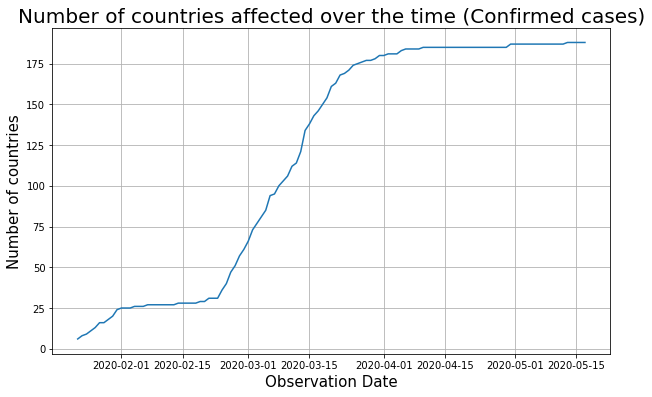

In [7]:
# Spread across globe (Confirmed cases)
import seaborn as sns
import matplotlib.pyplot as plt

num_country_confirmed = df_confirmed.set_index("Country") \
                            .drop(["Continent"], axis=1) \
                            .apply(lambda x: x[x > 0].count(), axis="index")
num_country_confirmed.index = pd.to_datetime(num_country_confirmed.index)

plt.figure(figsize=(10, 6))
sns.lineplot(data=num_country_confirmed)
plt.grid()
plt.title("Number of countries affected over the time (Confirmed cases)", fontsize=20)
plt.ylabel("Number of countries", fontsize=15)
plt.xlabel("Observation Date", fontsize=15)
plt.show()

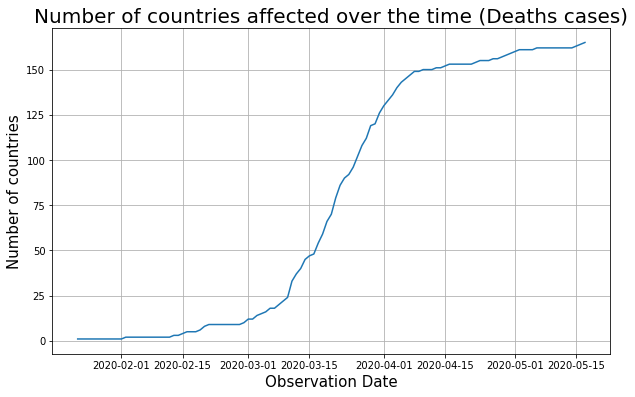

In [8]:
# Spread across globe (Deaths cases)
num_country_deaths = df_deaths.set_index("Country") \
                              .drop(["Continent"], axis=1) \
                              .apply(lambda x: x[x > 0].count(), axis="index")
num_country_deaths.index = pd.to_datetime(num_country_deaths.index)

plt.figure(figsize=(10, 6))
sns.lineplot(data=num_country_deaths)
plt.grid()
plt.title("Number of countries affected over the time (Deaths cases)", fontsize=20)
plt.ylabel("Number of countries", fontsize=15)
plt.xlabel("Observation Date", fontsize=15)
plt.show()

### Spread across Europe 

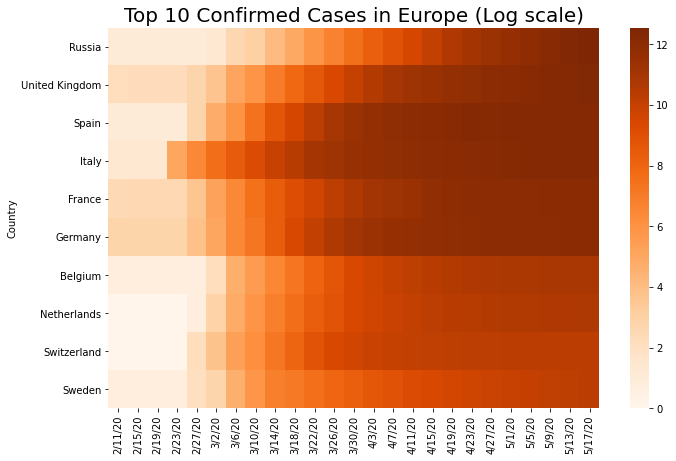

In [23]:
# Top 10 Confirmed Cases Heatmap
countries = np.asarray(df_confirmed.query("Continent == 'Europe'") \
  .sort_values(df_confirmed.columns[-1], ascending=False).Country[:10])

europe_confirmed_top = df_confirmed.set_index("Country").drop(["Continent"], axis=1).loc[countries,:]
temp = europe_confirmed_top.iloc[:, 20::4]
temp = np.log1p(temp)

plt.figure(figsize=(11, 7))
plt.title("Top 10 Confirmed Cases in Europe (Log scale)", fontsize=20)
sns.heatmap(data=temp, cmap="Oranges")
plt.show()

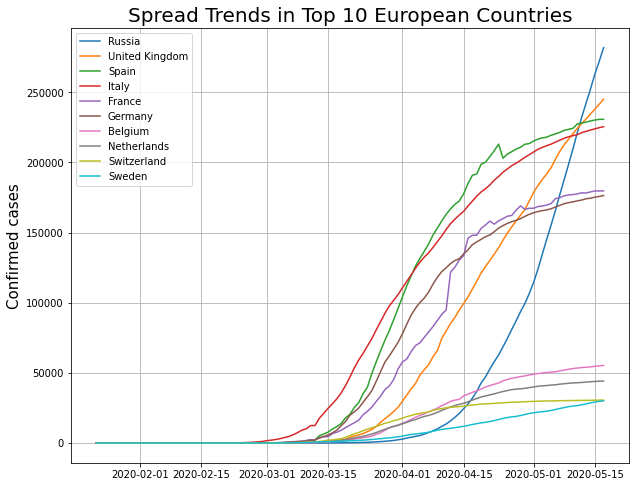

In [15]:
# Top 10 Confirmed Cases lineplot
plt.figure(figsize=(10, 8))
for index in europe_confirmed_top.index:
  sns.lineplot(x=pd.to_datetime(europe_confirmed_top.columns), y=europe_confirmed_top.loc[index, :], label=index)
plt.grid()
plt.ylabel("Confirmed cases", fontsize=15)
plt.title("Spread Trends in Top 10 European Countries", fontsize=20)
plt.show()

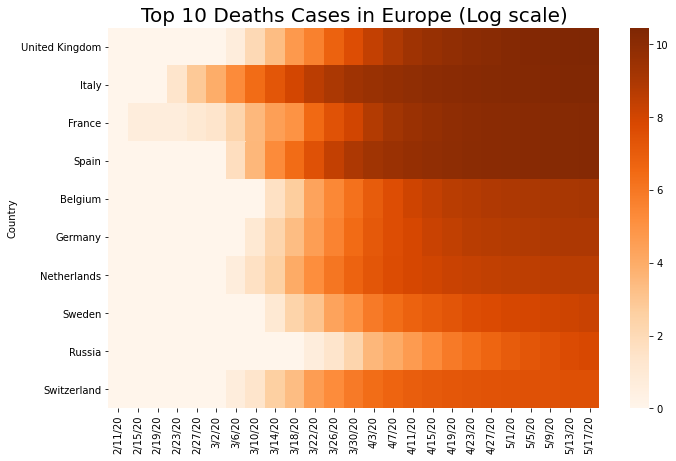

In [22]:
# Top 10 Deaths Cases Heatmap
countries = np.asarray(df_deaths.query("Continent == 'Europe'") \
  .sort_values(df_deaths.columns[-1], ascending=False).Country[:10])

europe_deaths_top = df_deaths.set_index("Country").drop(["Continent"], axis=1).loc[countries,:]
temp = europe_deaths_top.iloc[:, 20::4]
temp = np.log1p(temp)

plt.figure(figsize=(11, 7))
plt.title("Top 10 Deaths Cases in Europe (Log scale)", fontsize=20)
sns.heatmap(data=temp, cmap="Oranges")
plt.show()

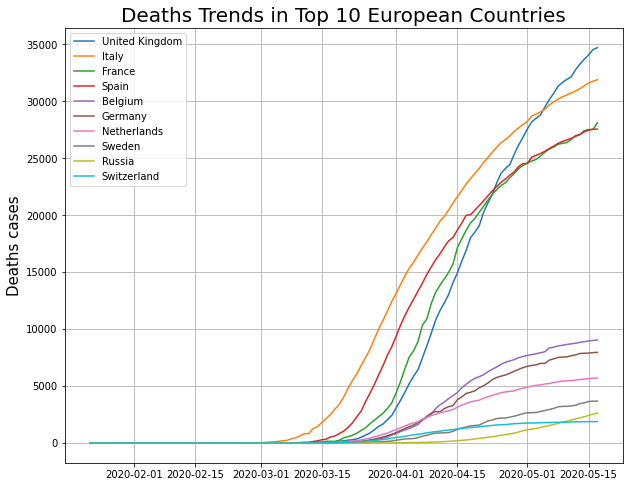

In [24]:
# Top 10 Deaths Cases lineplot
plt.figure(figsize=(10, 8))
for index in europe_deaths_top.index:
  sns.lineplot(x=pd.to_datetime(europe_deaths_top.columns), y=europe_deaths_top.loc[index, :], label=index)
plt.grid()
plt.ylabel("Deaths cases", fontsize=15)
plt.title("Deaths Trends in Top 10 European Countries", fontsize=20)
plt.show()